In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10 # CIFAR 10 since it has 10 classes

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("y_train.shape", y_train.shape)
# Also note over here that the targets are 2D array N x 1 instead of N.
# Therefore, we flatten them.
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
y_train.shape (50000, 1)
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 18s 5ms/step - loss: 1.5936 - accuracy: 0.4179 - val_loss: 1.2952 - val_accuracy: 0.5401
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3066 - accuracy: 0.5284 - val_loss: 1.1357 - val_accuracy: 0.5938
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1812 - accuracy: 0.5770 - val_loss: 1.0565 - val_accuracy: 0.6262
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0826 - accuracy: 0.6124 - val_loss: 1.0467 - val_accuracy: 0.6224
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0076 - accuracy: 0.6427 - val_loss: 0.9754 - val_accuracy: 0.6652
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9494 - accuracy: 0.6640 - val_loss: 0.9264 - val_accuracy: 0.6771
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8965 - accuracy: 0.6799 - val_loss: 0.8993 - val_accuracy

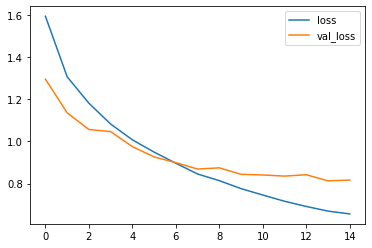

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

**Observation:**

We get an accuracy of 71 percent. So its clearer now that CIFAR 10 is en even more difficult dataset than MNIST and Fashion MNIST.

Again we see that there is some chance that we are Overfitting. Infact if you ran this longer, you might see the Validation loss increase even more. 
*Try that.*

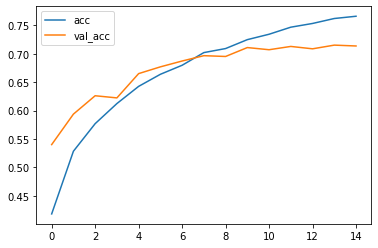

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

**Observation:**

We see that the training accuracy has not yet converged while the Validation accuracy is still steady. This is another sign that we could be Overfitting. 

If the training accuracy is getting higher without any improvement in the Validation accuracy, then the model is only learning to match the noise in the training set.

Confusion matrix, without normalization
[[760  16  40  20  25  10  16  18  66  29]
 [ 15 833   3  14   6   2  21   3  24  79]
 [ 64   3 561  77 118  55  69  36   8   9]
 [ 18   7  72 556  75 146  76  33   8   9]
 [ 14   2  57  61 711  35  36  77   6   1]
 [ 12   4  45 232  70 542  23  66   3   3]
 [  5   2  40  65  65  15 792   9   4   3]
 [  9   0  20  31  58  49  12 814   3   4]
 [ 61  31  15  21  10   5  10  10 820  17]
 [ 41  89  15  15  10  10  16  31  23 750]]


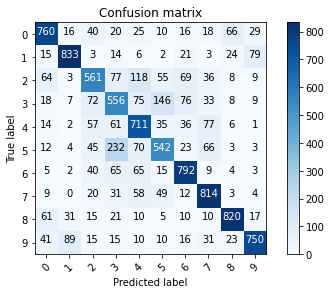

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

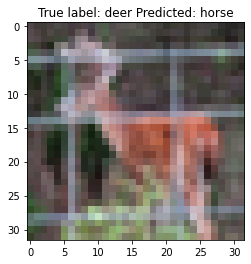

In [ ]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

Did you observe almost all of the images appear nothing at all. They seem to be quite blur barely helping us in identifying anything.

Therefore identifying classes of such images is also a challenge in Deep Learning. And hence there are a lot of misclassifications in the above Confusion Matrix.

*However, later on we will be improving these results. Lets skip the Confusion Matrix for now.*

# Happy Learning